In [9]:
using DelimitedFiles, FileIO
using Plots, Rsvg, LaTeXStrings
using Chemfiles, JUMD, NamedArrays
using LinearAlgebra, Statistics
using CSV
home_10 = "/home/pbarletta/labo/20/bisana/run/10_2lao-1lst"
rtdos = "/home/pbarletta/labo/20/bisana/rtdos_log"

"/home/pbarletta/labo/20/bisana/rtdos_log"

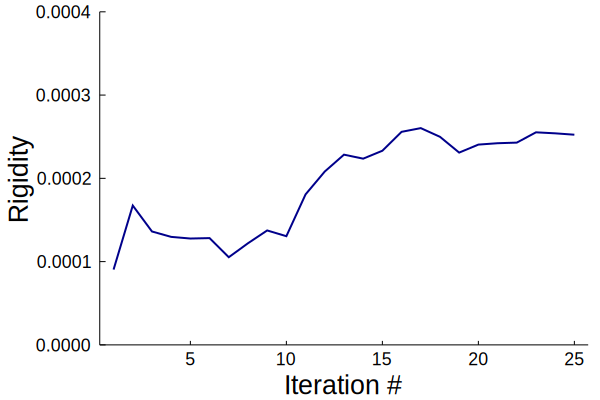

In [53]:
flx_5 = convert(Array{Float64, 1}, readdlm(joinpath(home_10, "ndd", "flx_5"))[:, 2])

plt_flx = plot(flx_5,
    legend = false, linewidth = 2, grid = false,
    linecolor = Colors.colorant"DarkBlue",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"), yrange = (0, 4E-4),
#     title = string("Rigidez a c/ paso"),
    yaxis = "Rigidity", xaxis = "Iteration #")

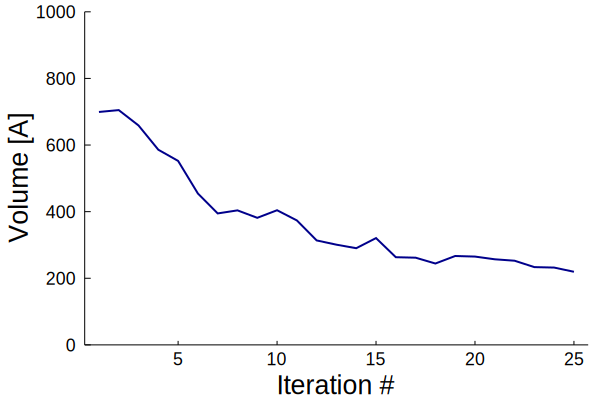

In [54]:
vol = convert(Array{Float64, 1}, readdlm(joinpath(home_10, "ndd", "vol"))[:, 2]);

plt_vol = plot(vol,
    legend = false, linewidth = 2, grid = false,
    linecolor = Colors.colorant"DarkBlue",
    yrange = (0, 1E3),
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
#     title = string("Volumen a c/ paso"),
    yaxis = "Volume [A]", xaxis = "Iteration #")

## Con RMS

In [55]:
rms_lb = CSV.read(joinpath(rtdos, "2lao-1lst_rmsd.csv"))[:, 4]
pushfirst!(rms_lb, 4.71);

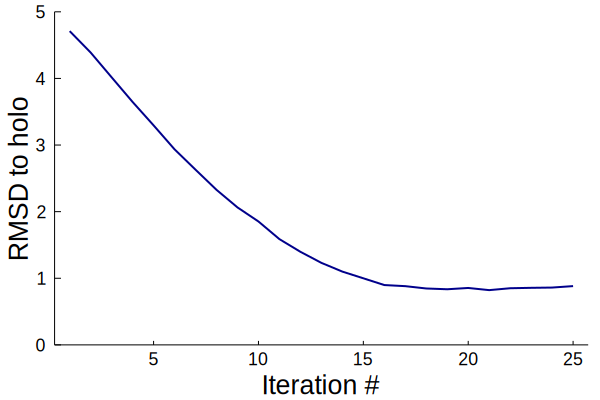

In [56]:
plt_flx = plot(rms_lb,
    legend = false, linewidth = 2, grid = false,
    linecolor = Colors.colorant"DarkBlue",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yrange = (0, 5),
#     title = string("Rigidez a c/ paso"),
    yaxis = "RMSD to holo", xaxis = "Iteration #")

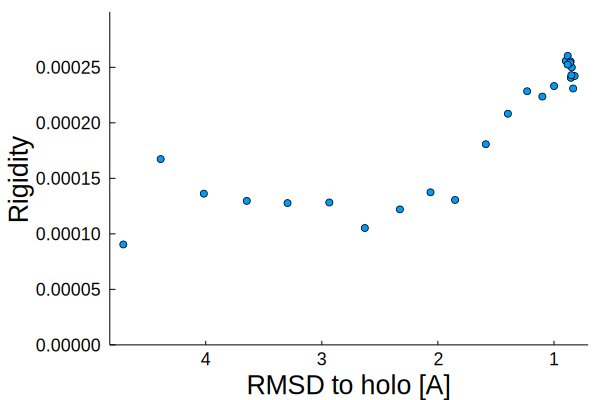

In [66]:
plt_flx = plot(rms_lb, flx_5,
    legend = false, linewidth = 2, grid = false,
    linecolor = Colors.colorant"DarkBlue",
    seriestype = [:scatter],
    yrange = (0, 3E-4),
    legendfont = font(12, "Arial"),
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    xflip = true,
    yaxis = "Rigidity", xaxis = "RMSD to holo [A]")

In [68]:
savefig(plt_flx, joinpath(rtdos, string("flx_2lao-1lst", ".svg")))

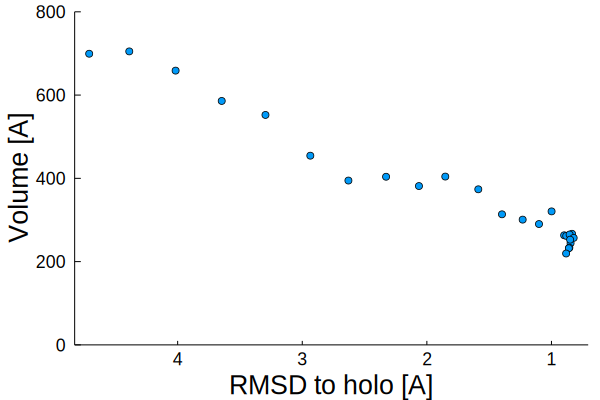

In [67]:
plt_vol = plot(rms_lb, vol,
    legend = false, linewidth = 2, grid = false,
    linecolor = Colors.colorant"DarkBlue",
    yrange = (0, .8E3),
    seriestype = [:scatter],
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    xflip = true,
#     title = string("Volumen a c/ paso"),
    yaxis = "Volume [A]", xaxis = "RMSD to holo [A]")

In [69]:
savefig(plt_vol, joinpath(rtdos, string("vol_2lao-1lst", ".svg")))